# 10. Datos para entrenar redes neuronales
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0-rc1


### Datos

In [2]:
from google.colab import files
# se debe cargar el fichero “cats_and_dogs_small.zip”
files.upload()

KeyboardInterrupt: ignored

In [4]:
# ULL que aquest es el meu fitxer
!wget --no-check-certificate \
  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0 \
  -O /content/cats_and_dogs_small.zip

--2020-01-10 22:09:11--  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip [following]
--2020-01-10 22:09:17--  https://www.dropbox.com/s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca684efc726f302c7e938efc73e.dl.dropboxusercontent.com/cd/0/inline/Av5y2ubt8n3_hbAzunYe94jqLjBcHUFhtrD5_a2T-v0CQXLhx06H7lZVsNCav5B8Kl0UIZNzwDbWx3acmDyAqJKtGB4992SK3rqjsBdofegxoAxpx7Fbl_pnz795cBfY0iQ/file# [following]
--2020-01-10 22:09:17--  https://uca684efc726f302c7e938efc73e.dl.dropboxusercontent.com/cd/0/inline/Av5y2ubt8n3_hbAzunYe94jqLjBcHUFhtrD5_a2T-v0CQXLhx06H7lZVsNCav5B8Kl0UIZNzw

In [5]:
!ls

cats_and_dogs_small.zip  sample_data


In [0]:
import os
import zipfile

local_zip = '/content/cats_and_dogs_small.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()


In [0]:

base_dir = '/content/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')



In [8]:
train_cat_fnames = os.listdir( train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])


['cat.402.jpg', 'cat.166.jpg', 'cat.735.jpg', 'cat.342.jpg', 'cat.440.jpg']
['dog.14.jpg', 'dog.194.jpg', 'dog.99.jpg', 'dog.989.jpg', 'dog.403.jpg']
['cat.1185.jpg', 'cat.1460.jpg', 'cat.1434.jpg', 'cat.1349.jpg', 'cat.1224.jpg']
['dog.1301.jpg', 'dog.1399.jpg', 'dog.1395.jpg', 'dog.1352.jpg', 'dog.1481.jpg']
['cat.1950.jpg', 'cat.1811.jpg', 'cat.1821.jpg', 'cat.1639.jpg', 'cat.1748.jpg']
['dog.1617.jpg', 'dog.1919.jpg', 'dog.1764.jpg', 'dog.1726.jpg', 'dog.1620.jpg']


In [9]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))


total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


Figura 10.3


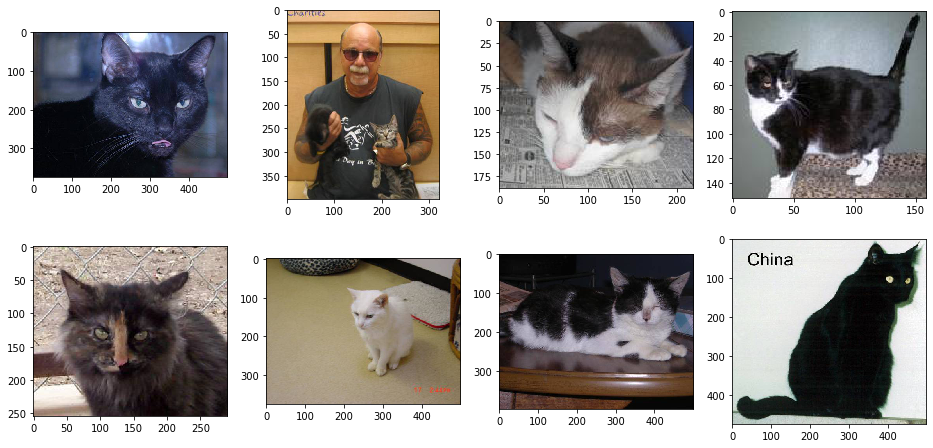

Figura 10.4


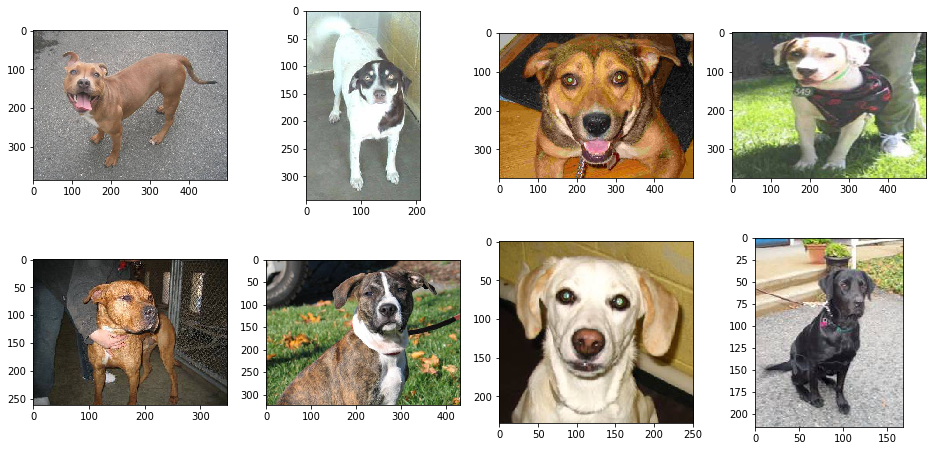

Figura 10.5


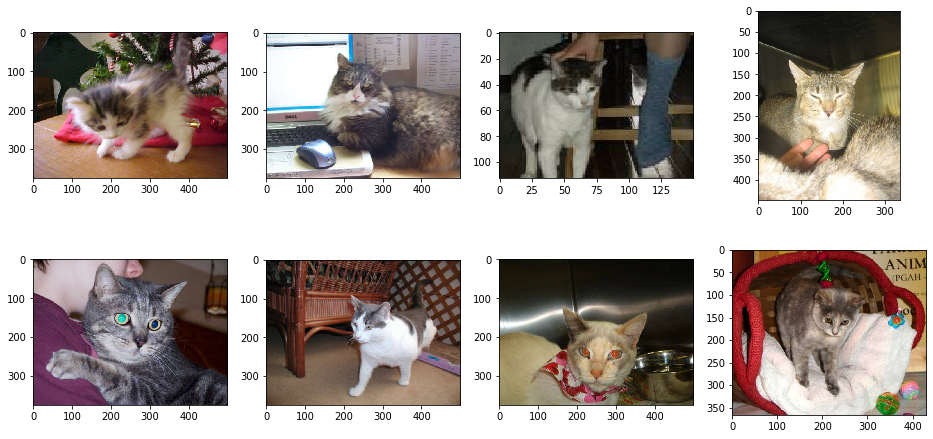

Figura 10.6


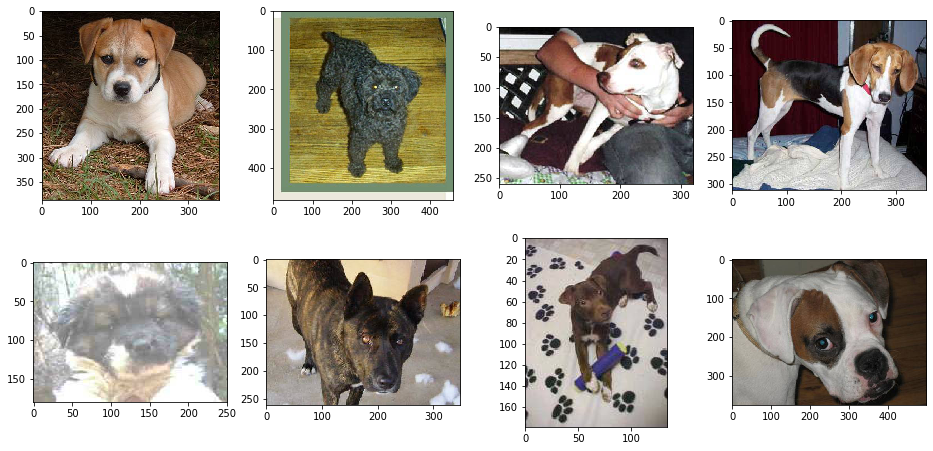

Figura 10.7


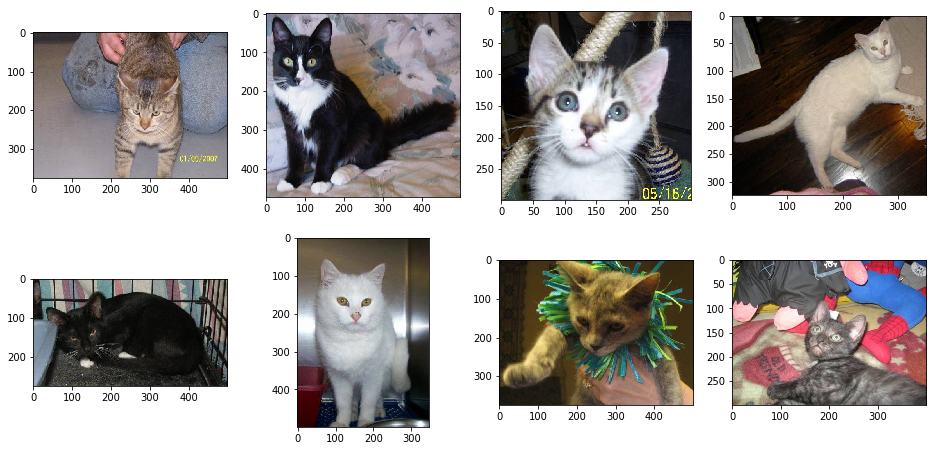

Figura 10.8


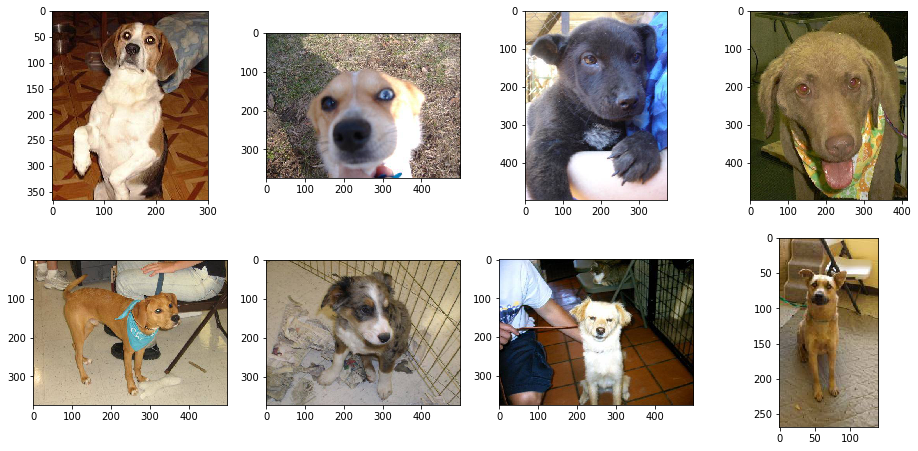

In [10]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def print_pictures(dir, fnames):
  # presentaremos images en una configuración de 4x4
  nrows = 4
  ncols = 4

  pic_index = 0 # Índice para iterar sobre las imagenes

  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  pic_index+=8

  next_pix = [os.path.join(dir, fname) 
                for fname in fnames[ pic_index-8:pic_index] 
               ]

  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

  
print("Figura 10.3")
print_pictures(train_cats_dir, train_cat_fnames)
print("Figura 10.4")
print_pictures(train_dogs_dir, train_dog_fnames)
print("Figura 10.5")
print_pictures(validation_cats_dir, validation_cat_fnames)
print("Figura 10.6")
print_pictures(validation_dogs_dir, validation_dog_fnames)
print("Figura 10.7")
print_pictures(test_cats_dir, test_cat_fnames)
print("Figura 10.8")
print_pictures(test_dogs_dir, test_dog_fnames)

## Modelo básico

In [0]:
import tensorflow as tf
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics = ['acc'])


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)


100
50


In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch= steps_per_epoch,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps= validation_steps,  
      verbose=2)



  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 - 16s - loss: 0.6935 - acc: 0.5245 - val_loss: 0.6746 - val_acc: 0.5920
Epoch 2/100
100/100 - 9s - loss: 0.6492 - acc: 0.6240 - val_loss: 0.6978 - val_acc: 0.5550
Epoch 3/100
100/100 - 9s - loss: 0.6080 - acc: 0.6705 - val_loss: 0.6506 - val_acc: 0.5890
Epoch 4/100
100/100 - 9s - loss: 0.5644 - acc: 0.7005 - val_loss: 0.7220 - val_acc: 0.5840
Epoch 5/100
100/100 - 9s - loss: 0.5278 - acc: 0.7350 - val_loss: 0.5932 - val_acc: 0.6770
Epoch 6/100
100/100 - 9s - loss: 0.5022 - acc: 0.7540 - val_loss: 0.6063 - val_acc: 0.6620
Epoch 7/100
100/100 - 9s - loss: 0.4826 - acc: 0.7670 - val_loss: 0.5699 - val_acc: 0.6890
Epoch 8/100
100/100 - 9s - loss: 0.4484 - acc: 0.7965 - val_loss: 0.5725 - val_acc: 0.7080
Epoch 9/100
100/100 - 9s - loss: 0.4231 - acc: 0.8020 - val_loss: 0.5708 - val_acc: 0.7050
Epoch 10/100
100/100 - 9s - loss: 0.3986 - acc: 0.8180 - val_loss: 0.5609 - val_acc: 0.

In [17]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

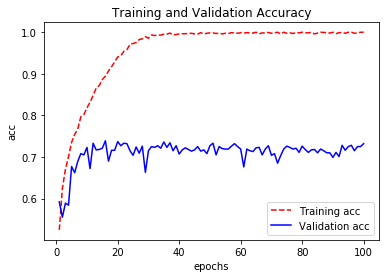

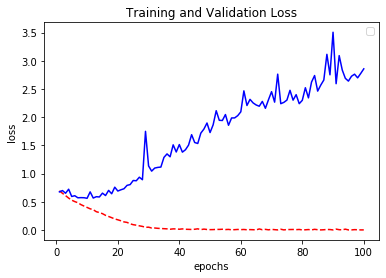

<Figure size 432x288 with 0 Axes>

In [18]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_loss ,  'b', label='Validation acc' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()




In [19]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

  ...
    to  
  ['...']
50/50 [==============================] - 3s 57ms/step - loss: 2.8565 - acc: 0.7320
Test Accuracy: 0.732


In [20]:
history_dict = history.history
print(history_dict.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Saving Wiliams-foto1.png to Wiliams-foto1 (4).png
[[8.649538e-36]]


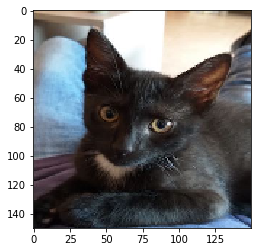

Wiliams-foto1.png IS A DOG


In [26]:
import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()
file=list(uploaded.keys())[0]

path='/content/' + file
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)  

classes = model.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0: print( fn + " IS A DOG")
else: print( fn + " IS A CAT")